In [289]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Define a function to integrate

In [306]:
def func(x):
    return np.cos(x)

In [307]:
#note: monte carlo integration is follows the formula (b-a)*(1/tol)*(f_x1+f_x2...)
def mc_core(ax,bx,func,n):
    #define range
    r = np.linspace(ax, bx, 1000)
    ay = min(func(r))
    by = max(func(r)) + 1
    
    x = np.random.uniform(ax,bx,n)      
    y = np.random.uniform(ay,by,n)
    

    #getting the actual answer
    f_x = 0.0
    for i in range(n):
        f_x += func(x[i])
        
    ans = (bx-ax)*f_x/float(n)
        
    return ans, ay, by

### Use the monte carlo scheme

In [308]:
def mc_integration(ax,bx,func,n,tol):
    n_new = n
    #define an iteration variable
    i = 0
    
    #define a max number of iterations
    imax = 50
    
    #define an error estimate
    delta = 100.0*np.fabs(tol)

    #set an array of integral answers
    I = np.zeros(imax,dtype=float)
    
    while(delta>tol):
        n_new += 10000
    
        ans1, ay, by = mc_core(ax,bx,func,n_new)
        ans2, ay, by = mc_core(ax,bx,func,n_new)
        
        delta = np.fabs(ans1 - ans2)
        
        print(i, ' : ', ans1,' , ', ans2)
        
    
        if(np.fabs(ans1 - ans2)>tol):
            
            i += 1
            
            if(i>imax):
                print("Max iterations reached")
                raise StopIteration("Stopping iterations after ", i)
            
    return ans1, ay, by
    
   
    

### execute the scheme

In [309]:
#define the domain and number of iterations
a = 0
b = 1.75
n = 10000
tol = 1.0e-3 #tolerance of the abs value of the difference between two monte carlo answers
f_int, ay, by = mc_integration(a, b, func, n,tol)


print(f_int)

0  :  0.9846044839369517  ,  0.9794028827677689
1  :  0.9859798657935867  ,  0.9787608076455496
2  :  0.9778400958836184  ,  0.984146240643194
3  :  0.9854794580467207  ,  0.9836975851098732
4  :  0.981530588592966  ,  0.9888188695995908
5  :  0.9847377767739773  ,  0.9809375300539797
6  :  0.9827075417641725  ,  0.9843946841168959
7  :  0.983205987339355  ,  0.9833849762495485
0.983205987339355


### Graph it

Text(0.5, 1.0, 'Definite interal of f(x) over the domain (0,1.75) = 0.983205987339355')

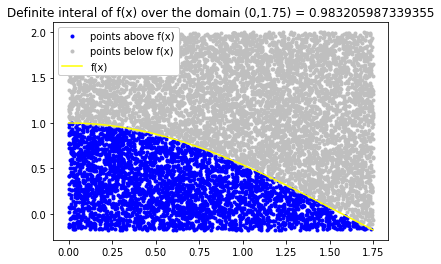

In [310]:
X = np.linspace(a,b,1000)
x = np.random.uniform(a,b,n)      
y = np.random.uniform(ay,by,n)

ans2, ay2, by2 = mc_core(a,b,func, n)

x = np.random.uniform(a,b,n)      
y = np.random.uniform(ay,by,n)

ir3 = np.where(y < func(x))
ur3 = np.where(y >= func(x))




plt.plot(x[ir3],y[ir3],'.',color='blue', label = 'points above f(x)')
plt.plot(x[ur3],y[ur3],'.',color='0.75',label = 'points below f(x)')
x1 = np.linspace(a,b, 1000)
y1 = func(x1)
plt.plot(x1,y1, color = 'yellow', label = 'f(x)')
plt.legend(framealpha = 1)
plt.title('Definite interal of f(x) over the domain ({},{}) = {}'.format(a,b,f_int))

